### 目标：判断图像中的主题cat or not: 1(cat) vs 0 (not cat) 1或0作为Label y
模型输入：RGB三通道色彩矩阵 展开为一个向量x 作为算法的输入 （将三个通道中的像素值依次放入向量x中）
例:
![demo_1](\D:\Jupyter%20Notebook%20Files\DeepLearning\images\1.png)




特征矩阵：将每个训练样本的特征作为矩阵的一列向量，若训练集中有m个样本，每个样本有n维特征，则特征矩阵的维度为n * m。 In Python, X.shape = (n, m)

标签矩阵：针对m个样本的标签（一个行向量） In Python, Y.shape = (1, m)

表示习惯：
- 单个训练样本的特征：x (小写x）, 维数为：$n_x$
- 特征矩阵：X
- 单个样本的Label: y
- Label矩阵: Y

### Logistic Regression
Given x, want y_hat = P(y=1|x). $x \in R^{n_X}$

Parameters: $w \in R^{n_X}$, $b \in R$

Output: $\hat{y} = \sigma (w^T x + b)$

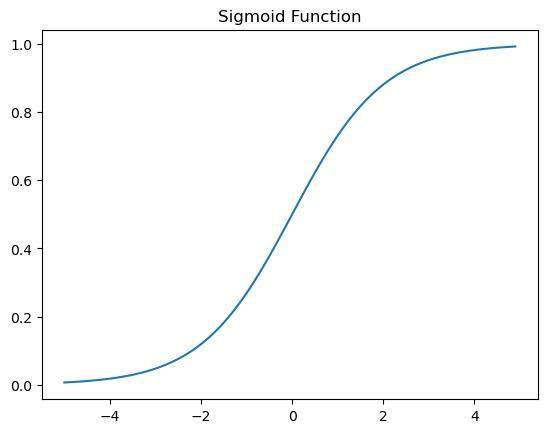

In [4]:
# sigmoid function 将Logistic Regression的输出结果挤压在-1, 1 之间

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-5, 5, 0.1)
y= 1 / (1 + np.exp(-x))

plt.plot(x, y)
plt.title('Sigmoid Function')
plt.show()

## Logistic Regression cost function

Loss Function (for single sample):
$$ L(\hat{y}, y) = -(ylog\hat{y} + (1-y)log(1 - \hat{y}))$$

Cost Function (for all samples):
$$ J(w, b) = \frac{1}{m} \sum_{i=1}^m L(\hat{y}^{(i)}, y^{(i)})$$
`Resolved in Notes`



## Gradiant Descent
Parameters: Learning rate($\alpha)$, gradient ($dw, db$)

When gradiant descent, repeat the $ w' = w - \alpha * dw$ and $ b' = b - \alpha * db$

- For Logistic Regression, zero initialization are useful.

## Computation Graph (The chain rule)

## Gradiant descent in Logistic Regression
`Resolved in Notes`

## Gradiant descent on m samples

$$\frac {\partial}{\partial w_1} J(w,b) = \frac {1}{m} \sum_{i=1}^{m} \frac {\partial}{\partial w_1} L(\hat{y}^{(i)}, y^{(i)})$$


## Vectorization  (Compute with Numpy)

In [28]:
import numpy as np
import time

# The contrast between normal computation and Vectorized computation

a = np.random.rand(1000000)
b = np.random.rand(1000000)

tic = time.time()
c = np.dot(a, b)
toc = time.time()

print(c)
print('Vectorized version:' + str(1000 * (toc - tic)) + 'ms')

c = 0
tic = time.time()

for i in range(1000000):
    c += a[i] * b[i]

toc = time.time()

print(c)
print('For loop version:' + str(1000 * (toc - tic)) + 'ms')

# Thus, whenever possible avoid explicit for-loops!!!

249934.13689874485
Vectorized version:1.0063648223876953ms
249934.13689874345
For loop version:398.7457752227783ms


## Vectorized Logistic Regression
![demo_2](\D:\Jupyter%20Notebook%20Files\DeepLearning\images\2.png)

## Python - Numpy 中的向量问题

In [29]:
import numpy as np

a = np.random.randn(5) # wired dataframe
print(a)
print(a.shape)

[ 1.39970143  0.63102193 -0.32965428  1.07805496 -1.32570929]
(5,)


In [30]:
print(a.T)

[ 1.39970143  0.63102193 -0.32965428  1.07805496 -1.32570929]


In [31]:
print(np.dot(a, a.T))

5.385732328886448


In [36]:
# Recommendation:
b = np.random.randn(5, 1)
print(b)
print(b.shape)

[[-0.8062771 ]
 [ 0.82431829]
 [-0.5331395 ]
 [-0.70690524]
 [-0.62188701]]
(5, 1)


In [37]:
print(b.T)
print(b.T.shape)

[[-0.8062771   0.82431829 -0.5331395  -0.70690524 -0.62188701]]
(1, 5)


In [34]:
print(np.dot(b, b.T))

[[ 0.51558188  0.18862573 -0.68242886  1.23736388 -0.80435996]
 [ 0.18862573  0.06900876 -0.24966673  0.45268981 -0.29427525]
 [-0.68242886 -0.24966673  0.90326903 -1.63778607  1.06465815]
 [ 1.23736388  0.45268981 -1.63778607  2.96959499 -1.93041299]
 [-0.80435996 -0.29427525  1.06465815 -1.93041299  1.25488302]]


In [39]:
# 判断某个向量的维度
assert (b.shape == (1, 5))

AssertionError: 

## Neural Network Overview
 右上角方括号表示NN层数

- Input Layer
- Hidden Layer
- Output Layer

在计算神经网络层数时，不包括输入层。即单隐含层的神经网络层数为 2

## Computing a Neural Network's output
For a node (Sigmoid function as activation function):
1. $z = w^T x + b$
2. $a = \sigma (z)$

![demo_3](\D:\Jupyter%20Notebook%20Files\DeepLearning\images\3.png)

## Vectorized computation:
![demo_4](\D:\Jupyter%20Notebook%20Files\DeepLearning\images\4.png)
结果中的四维向量被称为$Z^{[1]}$，且$a^{[1]} = \sigma(Z^{[1]})$

## Overview
![demo_5](\D:\Jupyter%20Notebook%20Files\DeepLearning\images\5.png)

## Computation on multiple samples
![demo_6](\D:\Jupyter%20Notebook%20Files\DeepLearning\images\6.png)

## Activation Function
1. Sigmoid function: $g(z) = \frac{1}{1+e^{-z}}$
2. Hyperbolic tangent function(Shifted sigmoid function) `Ranged -1 and 1` ,  $g(z) = tanh(z) = \frac{e^{z}-e^{-z}}{e^{z}+e^{-z}}$
3. ReLU function (Rectified Linear Unit)
4. Leaky ReLU function

Tips:
- Never use the `sigmoid function` as activation unless at output layer for a binary classification problem
- It's common to use Relu function as a default option


## Derivative of activation functions
1.For sigmoid function, $\frac{d}{dz}g(Z) = g(z)(1-g(z))$
2.For tanh(z),  $\frac{d}{dz}g(Z) = 1 - (tanh(z))^2$

## Gradient descent in Neural Network


## Random Initialization
- The weights of all nodes will be the same if we implement the zero initialization!
- Thus, we use the random initialization

In [12]:
import numpy as np

w1 = np.random.randn(2, 1) * 0.01
b1 = np.zeros((2, 1))

print(w1)
print(b1)

[[-0.0125078 ]
 [ 0.00542408]]
[[0.]
 [0.]]


## Deep Neural Network
